<a href="https://colab.research.google.com/github/vincent-martin-data/Analyse-exploratoire-donn-es-Openfoodfacts/blob/main/Notebook_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude préalable pour classification des produits par NLP

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import colorsys
from os import listdir
from os.path import isfile, join
from matplotlib.image import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/Data_P6"

csv_features			   flipkart_com-ecommerce_sample_1050.csv
enwiki_20180420_nolg_100d.txt.bz2  Images


In [4]:
# import des données

path = "/content/drive/My Drive/Colab Notebooks/Data_P6"

# Charger l'image
df_flipkart_text = pd.read_csv(path + "/" +"flipkart_com-ecommerce_sample_1050.csv")
df_flipkart_text.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Exploration et nettoyage du dataset

Visialisation des données fournies afin de determiner quelles sont les variables utiles, les variables inutiles ainsi que celles sur lesquelles nous devrons réaliser des opérations, verifier la présence ou absence de données manquantes.

In [5]:
df_flipkart_text.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
df_flipkart_text.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [7]:
df_flipkart_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [8]:
df_flipkart_text["product_specifications"][1]

'{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sathiyas cotton bath towel"}, {"key"=>"Ideal For", "value"=>"Men, Women, Boys, Girls"}, {"key"=>"Model ID", "value"=>"asvtwl322"}, {"key"=>"Color", "value"=>"Red, Yellow, Blue"}, {"key"=>"Size", "value"=>"Mediam"}, {"key"=>"Length", "value"=>"30 inch"}, {"key"=>"Width", "value"=>"60 inch"}, {"key"=>"Number of Contents in Sales Package", "value"=>"3"}, {"key"=>"Sales Package", "value"=>"3 Bath Towel"}]}'

Suppression des variables inutiles à notre projet.

In [9]:
del df_flipkart_text["retail_price"]
del df_flipkart_text["discounted_price"]
del df_flipkart_text["crawl_timestamp"]
del df_flipkart_text["product_rating"]
del df_flipkart_text["overall_rating"]
del df_flipkart_text["is_FK_Advantage_product"]
del df_flipkart_text["brand"]
del df_flipkart_text["product_specifications"]

In [10]:
df_flipkart_text["pid"].nunique()

1050

In [11]:
df_flipkart_text["uniq_id"].nunique()

1050

In [12]:
del df_flipkart_text["pid"]

### Création de features de catégories

In [13]:
df_flipkart_text

,uniq_id,product_url,product_name,product_category_tree,image,description
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,5912e037d12774bb73a2048f35a00009,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


####  Split de l' arbre de catégories

In [14]:
df_categories = df_flipkart_text.product_category_tree.str.split(pat='>>',expand=True)
df_flipkart_text["Category_first_level"] = df_categories[0]
df_flipkart_text["Category_second_level"] = df_categories[1]
df_flipkart_text["Category_third_level"] = df_categories[2]
df_flipkart_text["Category_fourth_level"] = df_categories[3]

df_flipkart_text.head()

,uniq_id,product_url,product_name,product_category_tree,image,description,Category_first_level,Category_second_level,Category_third_level,Category_fourth_level
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets


In [15]:
df_flipkart_text.shape

(1050, 10)

In [16]:
df_flipkart_text.head()

,uniq_id,product_url,product_name,product_category_tree,image,description,Category_first_level,Category_second_level,Category_third_level,Category_fourth_level
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets


In [17]:
df_flipkart_text["Category_second_level"].nunique()

63

In [18]:
df_flipkart_text["Category_second_level"].unique()

array([' Curtains & Accessories ', ' Baby Bath & Skin ', ' Bed Linen ',
       ' Wrist Watches ', ' Living Room Furnishing ', ' Bath Linen ',
       ' Candles & Fragrances ', ' Tableware & Cutlery ', ' Lighting ',
       ' JMD Home Furnishing ', ' Infant Wear ',
       " Kripa's Home Furnishing ", ' Hair Care ', ' Coffee Mugs ',
       ' Network Components ', ' Tablet Accessories ', ' Cookware ',
       ' Laptop Accessories ', ' Makeup ', ' Combos and Kits ',
       ' Feeding & Nursing ', ' Baby Bedding ',
       ' Kitchen & Dining Linen ', ' Containers & Bottles ',
       ' Consumables & Disposables ', ' Wall Decor & Clocks ',
       ' Table Decor & Handicrafts ', ' Flowers, Plants & Vases ',
       ' Software ', ' Showpieces ', ' Furniture & Furnishings ',
       ' Decorative Lighting & Lamps ', ' Baby Grooming ',
       ' Computer Peripherals ', ' Cushions, Pillows & Covers ',
       ' Storage ', ' Health Care ', ' Body and Skin Care ',
       ' Kitchen Tools ', ' TRUE Home Decor & 

In [19]:
pd.set_option('display.max_rows', 100)
df_flipkart_text["Category_second_level"].value_counts()

 Wrist Watches                        149
 Laptop Accessories                    87
 Infant Wear                           84
 Coffee Mugs                           74
 Showpieces                            71
 Bed Linen                             65
 Fragrances                            65
 Network Components                    49
 Cookware                              27
 Table Decor & Handicrafts             27
 Combos and Kits                       24
 Wall Decor & Clocks                   22
 Bath Linen                            21
 Curtains & Accessories                19
 Makeup                                18
 Baby Bedding                          15
 Body and Skin Care                    15
 Baby & Kids Gifts                     15
 Baby Bath & Skin                      14
 Kitchen Tools                         14
 Kitchen & Dining Linen                14
 Decorative Lighting & Lamps           14
 Containers & Bottles                  13
 Cushions, Pillows & Covers       

**Nous disposons de trop peu d'éléments dans chacune des sous catégories pour pouvoir travailler à un niveau supérieur que le premier niveau de l'arborescence**

In [20]:
df_flipkart_text["Category_first_level"] = df_flipkart_text["Category_first_level"].str.split('"').str[1]
df_flipkart_text.head()

,uniq_id,product_url,product_name,product_category_tree,image,description,Category_first_level,Category_second_level,Category_third_level,Category_fourth_level
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets


Nous ne conserverons que le premier niveau de l'arborescence des catégories produits.

In [21]:
del df_flipkart_text["Category_second_level"]
del df_flipkart_text["Category_third_level"]
del df_flipkart_text["Category_fourth_level"]
del df_flipkart_text["product_category_tree"]
del df_flipkart_text["uniq_id"]
del df_flipkart_text["product_url"]
del df_flipkart_text["product_name"]

df_flipkart_text_spacy = df_flipkart_text.copy()
df_flipkart_text.head()

,image,description,Category_first_level
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


### Effectif des catégories

Il est interressant d'avoir les effectifs de catégories les plus equilibrés possibles pour effectuer du machine learning.
Visualisons les effectifs de chacune des catégories de produit.

In [22]:
df_bar_categ = pd.DataFrame(df_flipkart_text["Category_first_level"].value_counts(normalize=True))
df_bar_categ["Category_first_level"] = df_bar_categ["Category_first_level"]*100
df_bar_categ.rename(columns={"Category_first_level": "Effectif dans chaque catégorie (%)"}, inplace=True)
df_bar_categ

,Effectif dans chaque catégorie (%)
Home Furnishing,14.285714
Baby Care,14.285714
Watches,14.285714
Home Decor & Festive Needs,14.285714
Kitchen & Dining,14.285714
Beauty and Personal Care,14.285714
Computers,14.285714


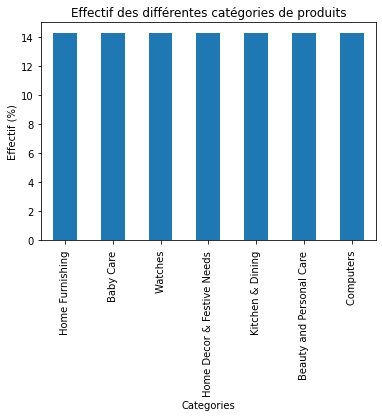

In [23]:
df_bar_categ.plot.bar()
plt.title("Effectif des différentes catégories de produits")
plt.xlabel("Categories") 
plt.ylabel("Effectif (%)")
plt.legend().remove()

# Natural Language Processing

## Import des librairies et écriture de fonctions pour prétraitement du texte

In [24]:
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

  En NLP l'ensemble du texte étudié ( ici les descriptions de toutes les produits, ou celles de tous les produits d'une catégorie) est appelé Corpus, un Document est une partie de ce corpus indépendant des autres textes (ici la description d'un produit), le plus petit élément d'un texte (mot, chifffre, nombre, abréviation ou ponctuation) est appelé Token et le vocabulaire est l'ensemble des tokens présent dans le corpus.

  Les fonctions suivantes permettent de traiter le texte pour analyse : tokenisation ("division" du corps de texte en Tokens), passage en minuscule, retrait des mots de moins de 3 lettres, retrait des "stopwords" (mots n'apportant pas d'informaation interessante et donc générateurs de bruit, et Lemmatization (les mots sont réduits à leur forme cannonique(singulier, infinitif pour les verbes, ...)

In [25]:
# Tokenizer
import spacy
import en_core_web_sm
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
nltk.download('omw-1.4')

def tokenizer_fct(sentence) :    
#   sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
#    word_tokens = word_tokenize(sentence)
    word_tokens = wordpunct_tokenize(sentence)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')',"..."]
stop_w.append('key feature')
stop_w.append('key features')
stop_w.append('key')
stop_w.append('feature')
stop_w.append('features')
stop_w.append('flipkart.com')
stop_w.append('flipkart')
stop_w.append('com')


def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Lemmatizer spacy

def lemma_spacy_fct(list_words) :
    lemmatizer = nlp.get_pipe("lemmatizer")
    lem_w = [w.lemma_ for w in list_words]
    return lem_w


# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df_flipkart_text['sentence_bow'] = df_flipkart_text['description'].apply(lambda x : transform_bow_fct(x))
df_flipkart_text['sentence_bow_lem'] = df_flipkart_text['description'].apply(lambda x : transform_bow_lem_fct(x))
df_flipkart_text['sentence_dl'] = df_flipkart_text['description'].apply(lambda x : transform_dl_fct(x))
df_flipkart_text.shape

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(1050, 6)

In [26]:
df_flipkart_text.head()

,image,description,Category_first_level,sentence_bow,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...


Verifions le résultat de ces opérations sur un document :

In [27]:
df_flipkart_text['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [28]:
transform_bow_lem_fct(df_flipkart_text['description'][0])

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interior this curtain made 100 high quality polyester fabric eyelet style stitch metal ring make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimension 

In [29]:
transform_bow_fct(df_flipkart_text['description'][0])

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors this curtain made 100 high quality polyester fabric eyelet style stitch metal ring makes room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor

In [30]:
transform_dl_fct(df_flipkart_text['description'][0])

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors . this curtain is made from 100 % high quality polyester fabric . it features an eyelet style stitch with metal ring . it makes the room environment romantic and loving . this curtain is ant - wrinkle and anti shrinkage and have elegant apparance . give your home a bright and modernistic appeal with these designs . the surreal attention is sure to steal hearts . these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening , you create the most special moments of joyous beauty given by the soothing prints . bring home the elegant curtain that softly filters light i


## Exploration des corpus

Nous allons effectuer une visualisation "Wordcloud" sur les différentes catégories de produits sur le texte lemmatisé.

### Wordcloud par catégories

In [31]:
df_Home_Furnishing  = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Home Furnishing ']
df_Baby_Care = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Baby Care ']
df_Watches = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Watches ']
df_Home_Decor  = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Home Decor & Festive Needs ']
df_Kitchen = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Kitchen & Dining ']
df_Beauty  = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Beauty and Personal Care ']
df_Computers = df_flipkart_text[df_flipkart_text["Category_first_level"]=='Computers ']


corpus_Home_Furnishing  = ""
corpus_Baby_Care = ""
corpus_Watches = ""
corpus_Home_Decor  = ""
corpus_Kitchen = ""
corpus_Beauty  = ""
corpus_Computers = ""


    
for index, row in df_Home_Furnishing.iterrows():
    corpus_Home_Furnishing = corpus_Home_Furnishing+" "+str(df_Home_Furnishing["sentence_bow_lem"][index])

for index, row in df_Baby_Care.iterrows():
    corpus_Baby_Care = corpus_Baby_Care+" "+str(df_Baby_Care["sentence_bow_lem"][index])
    
for index, row in df_Watches.iterrows():
    corpus_Watches = corpus_Watches+" "+str(df_Watches["sentence_bow_lem"][index])
    
for index, row in df_Home_Decor.iterrows():
    corpus_Home_Decor = corpus_Home_Decor+" "+str(df_Home_Decor["sentence_bow_lem"][index])
    
for index, row in df_Kitchen.iterrows():
    corpus_Kitchen = corpus_Kitchen+" "+str(df_Kitchen["sentence_bow_lem"][index])
    
for index, row in df_Beauty.iterrows():
    corpus_Beauty = corpus_Beauty+" "+str(df_Beauty["sentence_bow_lem"][index])
    
for index, row in df_Computers.iterrows():
    corpus_Computers = corpus_Computers+" "+str(df_Computers["sentence_bow_lem"])

In [32]:
wc_home = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_baby = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_watches = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_decor = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_kitchen = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_beauty = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

wc_computers = WordCloud(
    stopwords=stop_w,
    background_color='black',
    height=600,
    width=400
)

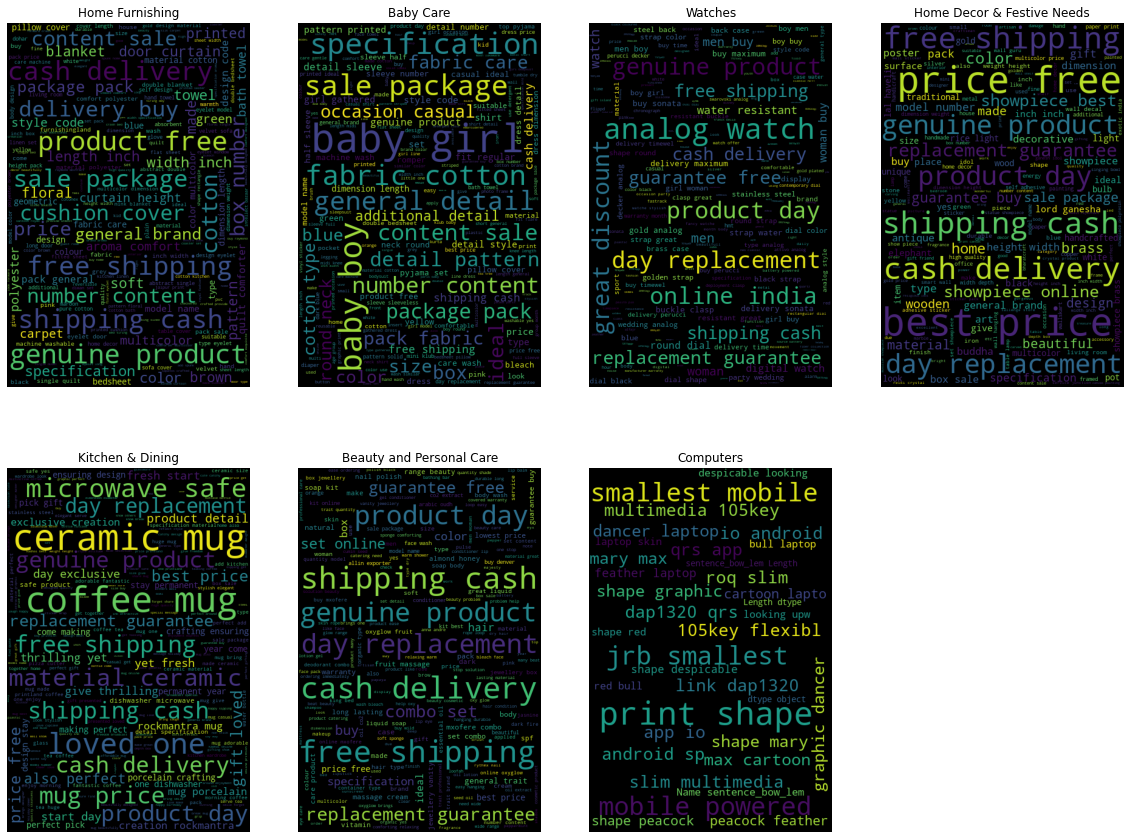

In [33]:
wc_home = wc_home.generate(corpus_Home_Furnishing)
wc_baby = wc_baby.generate(corpus_Baby_Care)
wc_watches = wc_watches.generate(corpus_Watches)
wc_decor = wc_decor.generate(corpus_Home_Decor)
wc_kitchen = wc_kitchen.generate(corpus_Kitchen)
wc_beauty = wc_beauty.generate(corpus_Beauty)
wc_computers = wc_computers.generate(corpus_Computers)



# Plot
# plot_cloud(wc_bow)

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.title('Home Furnishing')
plt.axis('off')
plt.imshow(wc_home)
plt.subplot(2,4,2)
plt.title('Baby Care')
plt.axis('off')
plt.imshow(wc_baby)
plt.subplot(2,4,3)
plt.title('Watches')
plt.axis('off')
plt.imshow(wc_watches)
plt.subplot(2,4,4)
plt.title('Home Decor & Festive Needs')
plt.axis('off')
plt.imshow(wc_decor)
plt.subplot(2,4,5)
plt.title('Kitchen & Dining')
plt.axis('off')
plt.imshow(wc_kitchen)
plt.subplot(2,4,6)
plt.title('Beauty and Personal Care')
plt.axis('off')
plt.imshow(wc_beauty)
plt.subplot(2,4,7)
plt.title('Computers')
plt.axis('off')
plt.imshow(wc_computers)

## Préparation commune des traitements

In [34]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING)

### Liste des catégories des différentes descriptions

In [35]:
l_cat = list(set(df_flipkart_text['Category_first_level']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_flipkart_text.iloc[i]['Category_first_level'])) for i in range(len(df_flipkart_text))]

catégories :  ['Watches ', 'Beauty and Personal Care ', 'Kitchen & Dining ', 'Computers ', 'Baby Care ', 'Home Furnishing ', 'Home Decor & Festive Needs ']


In [36]:
from nltk.tokenize import sent_tokenize, word_tokenize

df_flipkart_text['length_bow_lem'] = df_flipkart_text['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow_lem : ", df_flipkart_text['length_bow_lem'].max())
df_flipkart_text['length_bow'] = df_flipkart_text['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df_flipkart_text['length_bow'].max())
df_flipkart_text['length_dl'] = df_flipkart_text['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df_flipkart_text['length_dl'].max())

max length bow_lem :  377
max length bow :  377
max length dl :  648


### Fonctions communes de Visualisation T-SNE (t-distributed stochastic neighbor embedding), calcul ARI (Adjusted Rand Index), et clustering



In [37]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie Niveau 1 et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie", bbox_to_anchor=(1.05, 1.0))
    plt.title('Représentation par t-sne à 2 dimensions \n des descriptions d\'objets par catégories réelles')
    plt.axis('off')
    plt.tight_layout()
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters", bbox_to_anchor=(1.05, 1.0))
    plt.title('Représentation par t-sne à 2 dimensions \n des descriptions d\'objets par clustering Kmeans')
    plt.axis('off')
    plt.tight_layout()
    
    plt.show()
    print("ARI : ", ARI)

# Analyse "bag-of-words”, comptage simple de mots

## Traitement des documents

L'occurence de chaque mot est encodé en "one hot"

In [38]:
# création du bag of words CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df_flipkart_text[feat])

cv_transform = cvect.transform(df_flipkart_text[feat])   

## Exécution des modèles

In [39]:
print("CountVectorizer : ")
print("-----------------")
ARI_bow, X_tsne_bow, labels = ARI_fct(cv_transform)
print()


CountVectorizer : 
-----------------
ARI :  0.3774 time :  11.0



## Graphiques

In [40]:
labels_bow = np.copy(labels)


In [41]:
#labels = np.copy(labels_save)

In [42]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:2, 1:5, 2:0, 3:1, 4:3, 5:4, 6:6}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_bow_graph = np.vectorize(my_dict.get)(labels_bow)


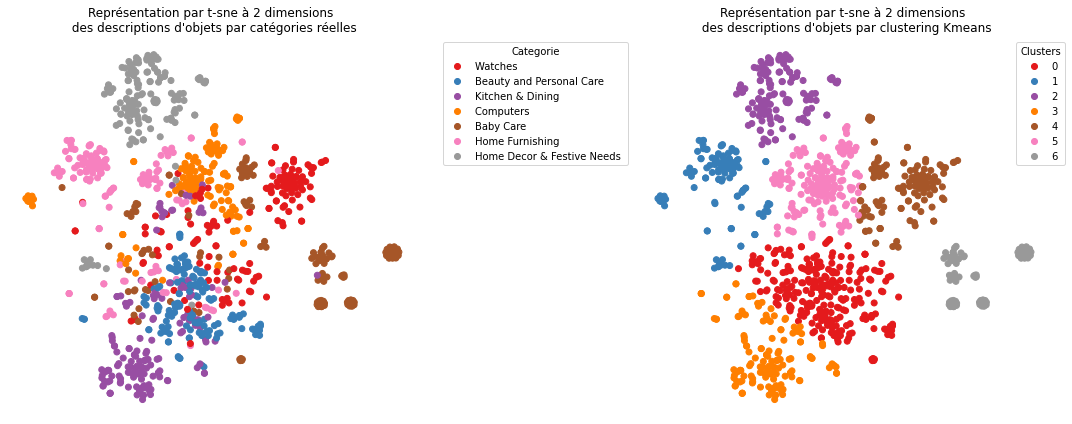

ARI :  0.3774


In [43]:
 TSNE_visu_fct(X_tsne_bow, y_cat_num, labels_bow_graph, ARI_bow)

# Bag of word - Tf-idf (term frequency-inverse document frequency)

## Traitement des documents

La frequence de chaque mot dans le document est multiplié par l'inverse de sa frequence dans le corpus, puis encodage en one hot (permet de faire ressortir l'importance des termes tres discriminants).

In [44]:
# création du bag of words Tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
ctf_fit = ctf.fit(df_flipkart_text[feat])
 
ctf_transform = ctf.transform(df_flipkart_text[feat])  

## Exécution des modèles

In [45]:
print("Tf-idf : ")
print("--------")
ARItf_idf, X_tsnetf_idf, labels = ARI_fct(ctf_transform)


Tf-idf : 
--------
ARI :  0.5595 time :  10.0


In [46]:
path

'/content/drive/My Drive/Colab Notebooks/Data_P6'


### Sauvegarde des features


In [47]:
ctf_transform.shape

(1050, 5231)

In [48]:
ctf_transform

pd.DataFrame(ctf_transform).to_csv(path + "/csv_features/features_tfidf.csv")

## Graphiques

In [49]:
labels_tf_idf = np.copy(labels)

In [50]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:4, 1:5, 2:1, 3:2, 4:0, 5:6, 6:3}
y_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_tf_idf_graph = np.vectorize(my_dict.get)(labels_tf_idf)

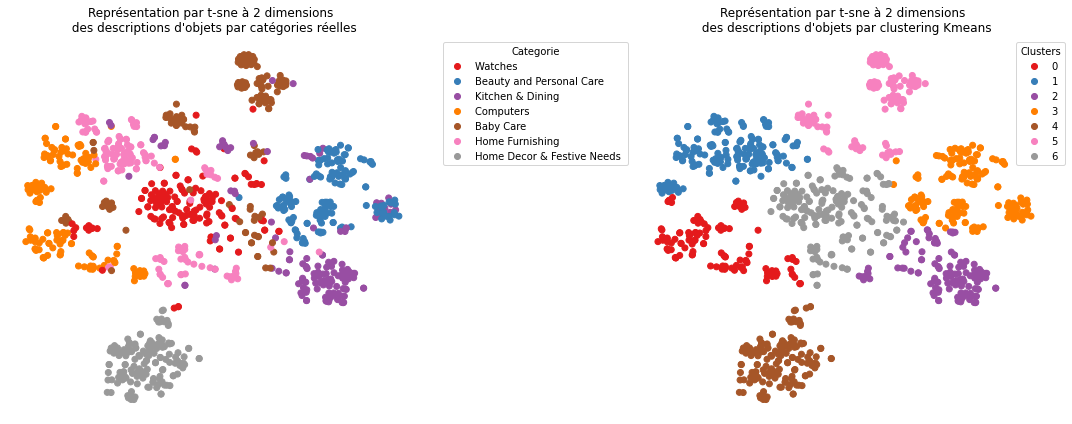

ARI :  0.5595


In [51]:
 TSNE_visu_fct(X_tsnetf_idf, y_cat_num, labels_tf_idf_graph, ARItf_idf)

# Bag of word - Tf-idf Bigrammes, Trigrammes

## Traitement des documents Tf-idf Bigrams

In [52]:
# création du bag of words Tf-idf bigrams

cvectb = CountVectorizer(ngram_range =(2, 2), stop_words='english', max_df=0.95, min_df=1)
ctfb = TfidfVectorizer(ngram_range = (2, 2), stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cvb_fit = cvectb.fit(df_flipkart_text[feat])
ctfb_fit = ctfb.fit(df_flipkart_text[feat])

cvb_transform = cvectb.transform(df_flipkart_text[feat])  
ctfb_transform = ctfb.transform(df_flipkart_text[feat])  

## Exécution des modèles Tf-idf Bigrams

In [53]:
print("Tf-idf-bigram : ")
print("--------")
ARI_tf_idfb, X_tsne_tf_idfb, labels = ARI_fct(ctfb_transform)

Tf-idf-bigram : 
--------
ARI :  0.3746 time :  9.0


## Graphiques Tf-idf Bigrams

In [54]:
labels_tf_idfb = np.copy(labels)

In [55]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:6, 1:4, 2:2, 3:3, 4:0, 5:5, 6:1}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_tf_idfb_graph = np.vectorize(my_dict.get)(labels_tf_idfb)

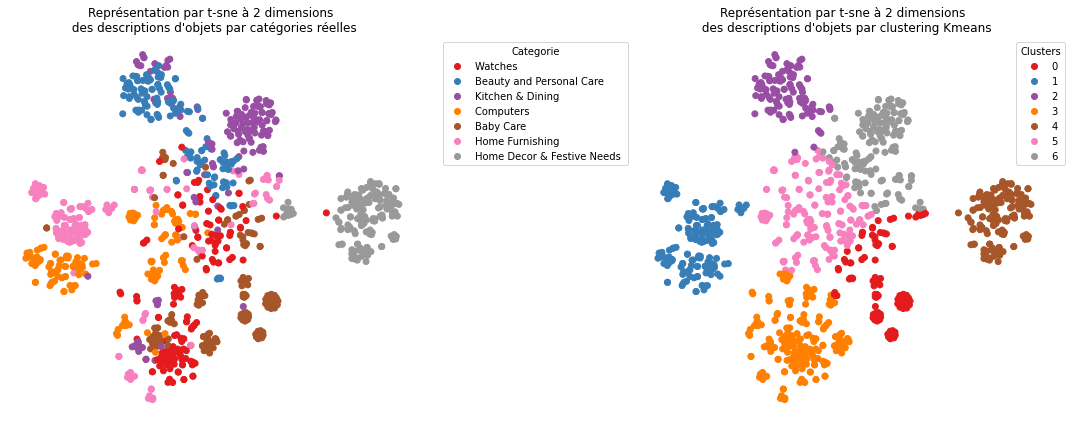

ARI :  0.3746


In [56]:
 TSNE_visu_fct(X_tsne_tf_idfb, y_cat_num, labels_tf_idfb_graph, ARI_tf_idfb)

## Traitement des documents  Tf-idf Trigrams



In [57]:
# création du bag of words Tf-idf trigrams

cvectt = CountVectorizer(ngram_range =(3, 3), stop_words='english', max_df=0.95, min_df=1)
ctft = TfidfVectorizer(ngram_range = (3, 3), stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cvt_fit = cvectt.fit(df_flipkart_text[feat])
ctft_fit = ctft.fit(df_flipkart_text[feat])

cvt_transform = cvectt.transform(df_flipkart_text[feat])  
ctft_transform = ctft.transform(df_flipkart_text[feat])  

## Exécution des modèles Tf-idf Trigrams

In [58]:
print("Tf-idf-trigram : ")
print("--------")
ARI_tf_idft, X_tsne_tf_idft, labels = ARI_fct(ctft_transform)

Tf-idf-trigram : 
--------
ARI :  0.2888 time :  10.0


## Graphiques Tf-idf Trigrams

In [59]:
labels_tf_idft = np.copy(labels)

In [60]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:3, 1:5, 2:1, 3:6, 4:2, 5:0, 6:4}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_tf_idft_graph = np.vectorize(my_dict.get)(labels_tf_idft)

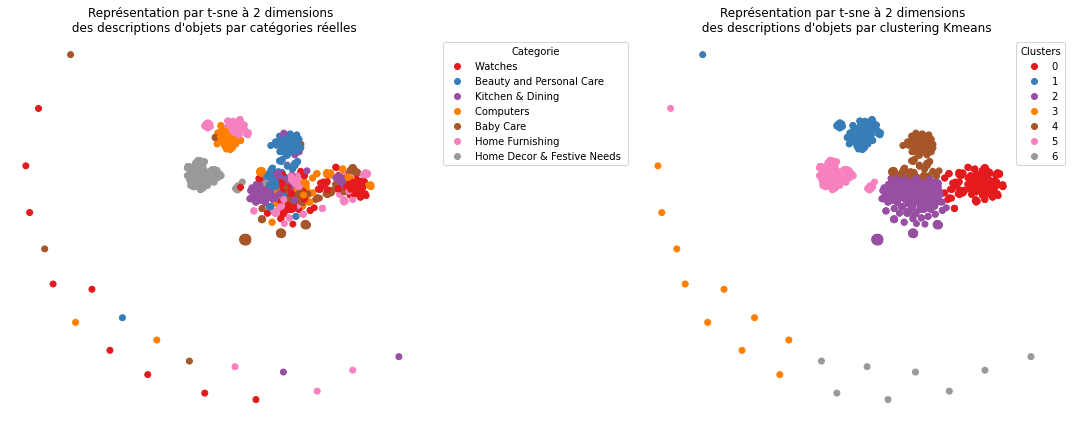

ARI :  0.2888


In [61]:
 TSNE_visu_fct(X_tsne_tf_idft, y_cat_num, labels_tf_idft_graph, ARI_tf_idft)

# Word/sentence embedding classique avec Word2Vec

In [62]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

Le word embedding permet, en réduisant la dimension de capturer le contexte, la similarité sémantique et syntaxique (genre, synonymes, …) d’un mot.

La méthode d’embedding pour réduire la dimension d’un vecteur consiste à utiliser le résultat que retourne une couche dense, c’est à dire de multiplier une matrice d’embedding W par la représentation « one hot » du mot

In [63]:
w2v_size=300 # Dimension du vecteur d'embedding
w2v_window=5 # Nombre de tokens dans la fenetre d'analyse
w2v_min_count=1 # on ignore les tokens avec une occurence inferieure à 1
w2v_epochs=100 # Pour dire combien de fois le modèle doit parcourir toutes les données d’entrainement.
maxlen = 25 # longueur maximale de chaque phrase
sentences = df_flipkart_text['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [64]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [67]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                  #  size=w2v_size,
                                   seed=42,
                                   workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4680
Word2Vec trained


In [68]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4681


## Création de la matrice d'embedding

In [69]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4681, 300)


## Création du modèle d'embedding

In [70]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 300)           1404300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,404,300
Trainable params: 1,404,300
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [71]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [72]:
ARI_w2v, X_tsne_w2v, labels = ARI_fct(embeddings)

ARI :  0.2953 time :  30.0


In [73]:
labels_w2v = np.copy(labels)

In [74]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:2, 1:5, 2:0, 3:6, 4:4, 5:3, 6:1}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_w2v_graph = np.vectorize(my_dict.get)(labels_w2v)

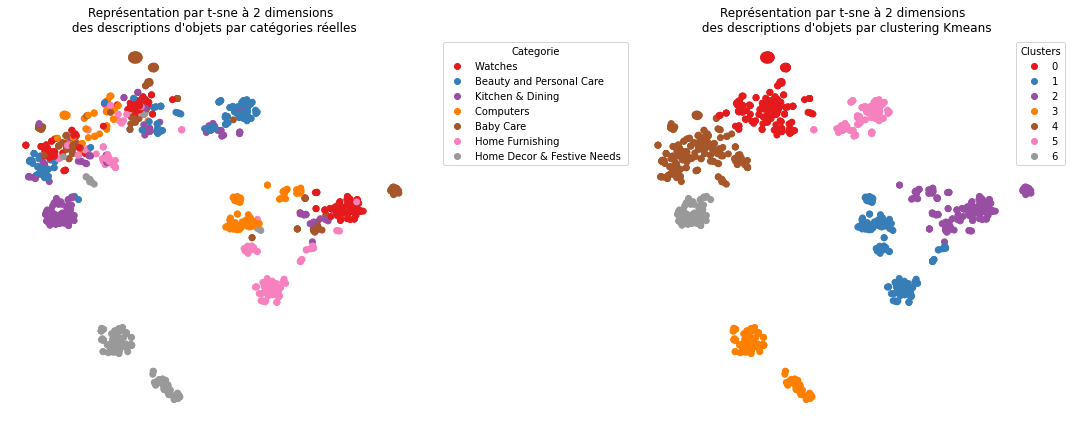

ARI :  0.2953


In [75]:
TSNE_visu_fct(X_tsne_w2v, y_cat_num, labels_w2v_graph, ARI_w2v)

# word/sentence embedding avec BERT

In [76]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [77]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.2
2.9.2
Num GPUs Available:  1
True


## Fonctions communes

In [78]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT hub Tensorflow

In [79]:
import tensorflow_hub as hub
#import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [80]:
sentences = df_flipkart_text['sentence_dl'].to_list()

In [81]:
from transformers import AutoTokenizer

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

temps traitement :  11.0


In [82]:
ARI_bert_2, X_tsne_bert_2, labels = ARI_fct(features_bert)

ARI :  0.3168 time :  8.0


In [83]:
labels_bert_2 = np.copy(labels)

In [84]:
# Changement couleurs pour match entre les 2 graphiques
my_dict = {0:2, 1:5, 2:4, 3:0, 4:5, 5:1, 6:3}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_bert_2_graph = np.vectorize(my_dict.get)(labels_bert_2)

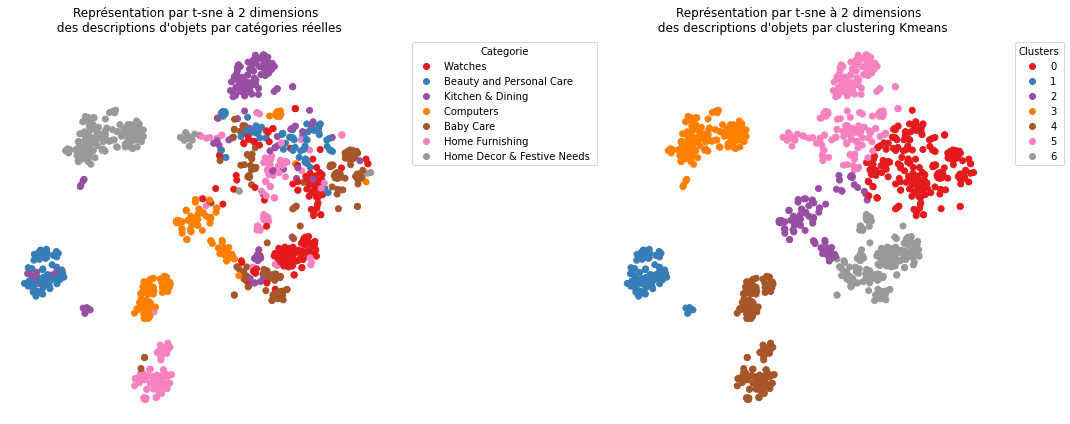

ARI :  0.3168


In [85]:
TSNE_visu_fct(X_tsne_bert_2, y_cat_num, labels_bert_2_graph, ARI_bert_2)

# Word/sentence embedding avec USE - Universal Sentence Encoder

In [86]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [87]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.2
2.9.2
Num GPUs Available:  1
True


In [88]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [89]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [90]:
batch_size = 10
sentences = df_flipkart_text['sentence_dl'].to_list()

In [91]:
features_USE = feature_USE_fct(sentences, batch_size)

In [92]:
ARI_use, X_tsne_use, labels = ARI_fct(features_USE)

ARI :  0.4386 time :  9.0


In [93]:
labels_use = np.copy(labels)

In [94]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:4, 1:5, 2:3, 3:0, 4:1, 5:2, 6:6}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_use_graph = np.vectorize(my_dict.get)(labels_use)

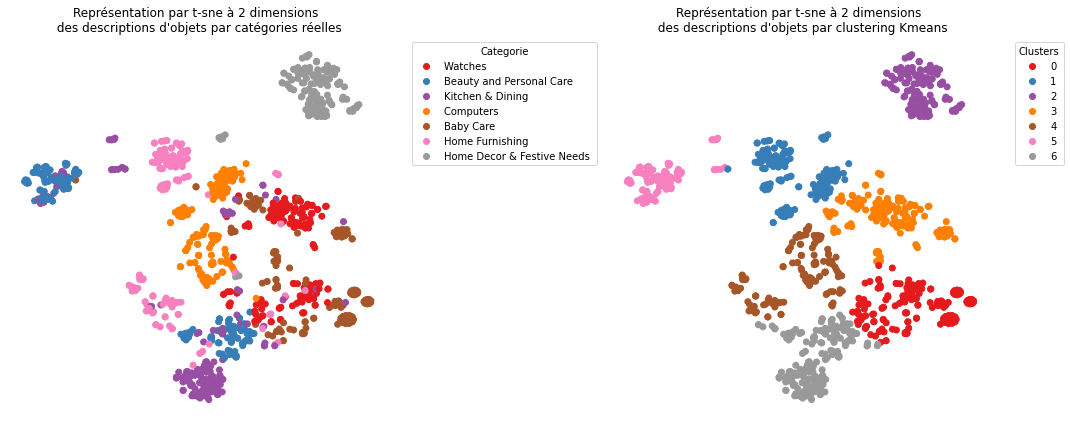

ARI :  0.4386


In [95]:
TSNE_visu_fct(X_tsne_use, y_cat_num, labels_use_graph, ARI_use)

# Analyse utilisant spacy

In [96]:
import spacy
import en_core_web_sm

## Exploration

In [97]:
df_flipkart_text_spacy.head()

,image,description,Category_first_level
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [98]:
# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_md")

### Creation d'un doc du texte complet de description

In [99]:
# description_complet = str(df_flipkart_text_spacy["description"])

description_complet = []

for index, row in df_flipkart_text_spacy.iterrows():
    description_complet = str(description_complet)+""+str(df_flipkart_text_spacy["description"][index])

len(description_complet)

497514

In [100]:
nlp_description_complet = nlp(description_complet)

#### Nombre de tokens du Doc complet

In [101]:
len(nlp_description_complet)

93552

In [102]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

STOP_WORDS.add("key feature")
STOP_WORDS.add("key features")
STOP_WORDS.add("feature")
STOP_WORDS.add("features")
STOP_WORDS.add("key")

{'as', 'full', 'was', 'well', 'why', 'whoever', '’d', 'at', 'even', 'if', 'any', 'move', 'then', 'twenty', 'amongst', 'see', 'could', 'together', 'wherever', 'alone', 'however', 'few', 'thereby', 'were', 'has', 'ourselves', 'quite', 'up', 'amount', 'own', 'without', 'more', '’m', 'i', 'often', 'other', 'every', 'along', 'please', 'him', 'himself', 'after', 'anything', 'several', "'ll", 'hereafter', 'under', 'than', '‘ve', 'by', 'before', 'eight', 'ours', 'within', 'his', 'whom', 'sixty', 'all', 'moreover', 'used', 'none', 'namely', 'now', 'just', 'on', 'doing', 'ten', 'themselves', 'became', 'never', 'thru', 'though', 'yourself', 'yet', 'seem', 'per', 'herself', 'four', 'seems', 'whole', '‘s', 'hundred', 'except', 'formerly', 'whereby', '‘ll', 'neither', 'when', 'becomes', 'n’t', 'someone', 'me', 'among', 'their', 'thereupon', '‘d', 'itself', 'against', 're', 'due', 'anyone', 'much', 'must', 'using', 'third', 'whose', 'thereafter', 'nobody', 'ever', '‘re', 'show', 'into', 'be', 'thence

## Bag of words tf idf, et tf-idf part-of-speech-tagging

#### Pretraitement BOW (Lemmatization, passage en minuscule, retrait des stopwords, de la ponctuation et des mots de moins de 3 lettres du doc complet)

In [103]:
# Conservation uniquement des PROPN et NOUN et passage en minuscule

description_complet_lower_POST = " ".join(token.lower_ for token in nlp_description_complet 
                                                   if  (token.pos_=="PROPN" or token.pos_=="NOUN"))

nlp_description_complet_lower_POST = nlp(description_complet_lower_POST)

# Passage en minuscule et suppression des mots de moins de 3 lettres
description_complet_lower_3 = " ".join(token.lower_ for token in nlp_description_complet 
                                                   if  len(str(token))>2)

nlp_description_complet_lower_3 = nlp(description_complet_lower_3)

# lemmatization et retrait des stopwords
description_complet_lemma = " ".join(token.lemma_ for token in nlp_description_complet_lower_3 
                                                   if not token.is_stop)

nlp_description_complet_lemma = nlp(description_complet_lemma)

# Retrait de la ponctuation

description_complet_lemma_punct = " ".join(token.lemma_ for token in nlp_description_complet_lemma 
                                                   if not token.is_punct)

nlp_description_complet_lemma_punct = nlp(description_complet_lemma_punct)


print("Nbre de tokens Doc decription complet : "+str(len(nlp_description_complet))+"\n"
+"Nbre de tokens Doc decription complet mots de 3 lettres et + : "+str(len(nlp_description_complet_lower_3))+"\n"
+"Nbre de tokens Doc decription complet mots de 3 lettres et + Lemmatizé : "+str(len(nlp_description_complet_lemma))+"\n"
+"Nbre de tokens Doc decription complet mots de 3 lettres et + Lemmatizé sans ponctuation : "+str(len(nlp_description_complet_lemma_punct))+"\n")

Nbre de tokens Doc decription complet : 93552
Nbre de tokens Doc decription complet mots de 3 lettres et + : 66135
Nbre de tokens Doc decription complet mots de 3 lettres et + Lemmatizé : 53601
Nbre de tokens Doc decription complet mots de 3 lettres et + Lemmatizé sans ponctuation : 53472



In [104]:
# nlp_description_complet.text

In [105]:
# nlp_description_complet_lower_POST.text

In [106]:
# nlp_description_complet_lower_3.text

In [107]:
# nlp_description_complet_lemma.text

In [108]:
# nlp_description_complet_lemma_punct.text

### Création d'une liste contenant les doc de chaque description

In [109]:
descriptions = []

for index, row in df_flipkart_text_spacy.iterrows():
    descriptions.append(str(df_flipkart_text_spacy["description"][index]))

nlp_descriptions = []

for doc in descriptions:
  sentence = nlp(doc)
  nlp_descriptions.append(sentence)

In [110]:
len(nlp_descriptions)

1050

In [111]:
nlp_descriptions[100].text

'Buy Goldencollections GC4353 Makeup and Jewellery Vanity Pouch for Rs.783 online. Goldencollections GC4353 Makeup and Jewellery Vanity Pouch at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

In [112]:
for ent in nlp_descriptions[100].ents:
  print(ent.text, ent.label_)

Jewellery Vanity Pouch PERSON
Rs.783 ORG
Goldencollections GC4353 ORG
Jewellery Vanity Pouch PERSON
FREE shipping & ORG
Products ORG
30 Day DATE


#### Prétraitement BOW de la liste de Doc de toutes les descriptions

In [113]:
nlp_descriptions_bow = []


for doc in nlp_descriptions:


  # Passage en minuscule et suppression des mots de moins de 3 lettres
  description_lower_3 = " ".join(token.lower_ for token in doc 
                                                    if  len(str(token))>2)

  nlp_description_lower_3 = nlp(description_lower_3)

  # lemmatization et retrait des stopwords
  description_lemma = " ".join(token.lemma_ for token in nlp_description_lower_3 
                                                    if not token.is_stop)

  nlp_description_lemma = nlp(description_lemma)

  # Retrait de la ponctuation

  description_lemma_punct = " ".join(token.lemma_ for token in nlp_description_lemma 
                                                    if not token.is_punct)

  nlp_description_lemma_punct = nlp(description_lemma_punct)

  nlp_descriptions_bow.append(nlp_description_lemma_punct)




In [114]:
# nlp_descriptions_bow[1].text

In [115]:
# Liste des chaines de caracteres des descriptions prétraitées

descriptions_bow = []

for doc in nlp_descriptions_bow:
  sentence = str(doc)
  descriptions_bow.append(sentence)

In [116]:
# Création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

df_descriptions_bow = pd.DataFrame(descriptions_bow)

cv_fit = cvect.fit(df_descriptions_bow[0])

cv_transform = cvect.transform(df_descriptions_bow[0])
ctf_transform = ctf.transform(df_descriptions_bow[0]) 

In [117]:
## Exécution des modèles

In [118]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_spacy, X_tsne_spacy, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.42 time :  10.0

Tf-idf : 
--------
ARI :  0.4987 time :  9.0


In [119]:
## Graphiques

In [120]:
labels_spacy = np.copy(labels)

In [121]:
# Changement couleurs pour match entre les 2 graphiques
#my_dict = {0:5, 1:2, 2:0, 3:4, 4:6, 5:3, 6:1}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_spacy_graph = np.vectorize(my_dict.get)(labels_spacy)

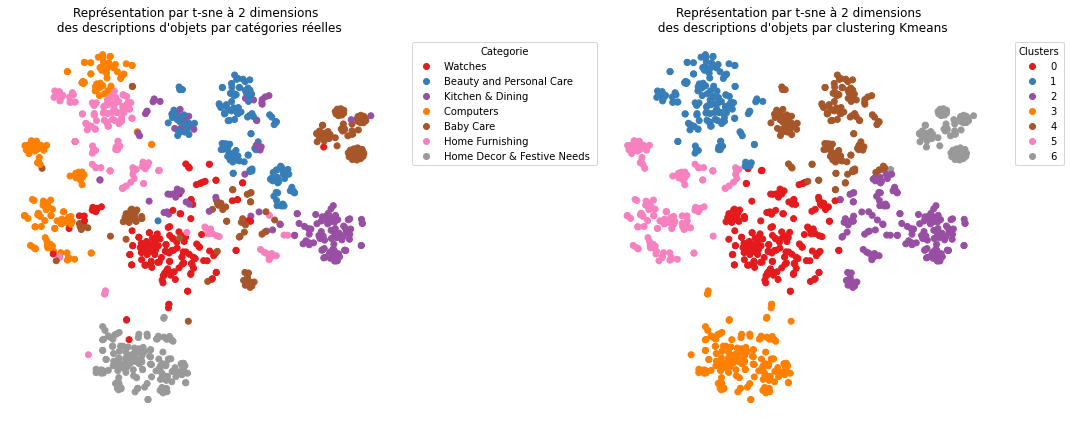

ARI :  0.4987


In [122]:
 TSNE_visu_fct(X_tsne_spacy, y_cat_num, labels_spacy_graph, ARI_spacy)

## Tf-idf part of speech tagging

POS tagging : consiste à considérer la catégorie grammatical d’un mot (verbe nom etc)

In [123]:
nlp_description_lower_POST_tfidf = []

for doc in nlp_descriptions:

  # Conservation uniquement des PROPN et VERB et passage en minuscule

  description_lower_POST = " ".join(token.lemma_.lower() for token in doc 
                                                   if  (
                                                    # token.pos_=="NOUN"
                                                    # or 
                                                    token.pos_=="PROPN" 
                                                    or token.pos_=="VERB"
                                                    ))

  nlp_description_lower_POST = nlp(description_lower_POST)

  nlp_description_lower_POST_tfidf.append(nlp_description_lower_POST)


In [124]:
# Liste des chaines de caracteres des descriptions prétraitées

descriptions_lower_POST_tfidf = []

for doc in nlp_description_lower_POST_tfidf:
  sentence = str(doc)
  descriptions_lower_POST_tfidf.append(sentence)

In [125]:
# Création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

df_descriptions_lower_POST_tfidf = pd.DataFrame(descriptions_lower_POST_tfidf)

cv_fit = cvect.fit(df_descriptions_lower_POST_tfidf[0])

cv_transform = cvect.transform(df_descriptions_lower_POST_tfidf[0])
ctf_transform = ctf.transform(df_descriptions_lower_POST_tfidf[0]) 

In [126]:
## Exécution des modèles

In [127]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_spacy_POS, X_tsne_spacy_POS, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.4123 time :  10.0

Tf-idf : 
--------
ARI :  0.5075 time :  9.0


In [128]:
## Graphiques

In [129]:
labels_spacy_POS = np.copy(labels)

In [130]:
# Changement couleurs pour match entre les 2 graphiques
# my_dict = {0:2, 1:5, 2:0, 3:4, 4:1, 5:6, 6:2}
my_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
labels_spacy_POS_graph = np.vectorize(my_dict.get)(labels_spacy_POS)

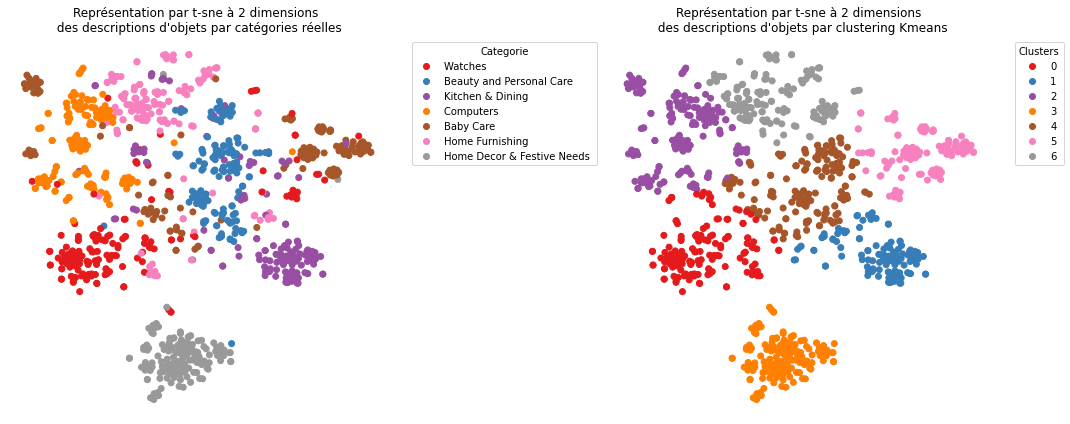

ARI :  0.5075


In [131]:
 TSNE_visu_fct(X_tsne_spacy_POS, y_cat_num, labels_spacy_POS_graph, ARI_spacy_POS)